In [272]:
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [273]:
# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)
file = "Life Expectancy Data.csv"

Path to dataset files: /Users/nathanlonghurst/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


In [274]:
data = pd.read_csv(path + "/" + file)

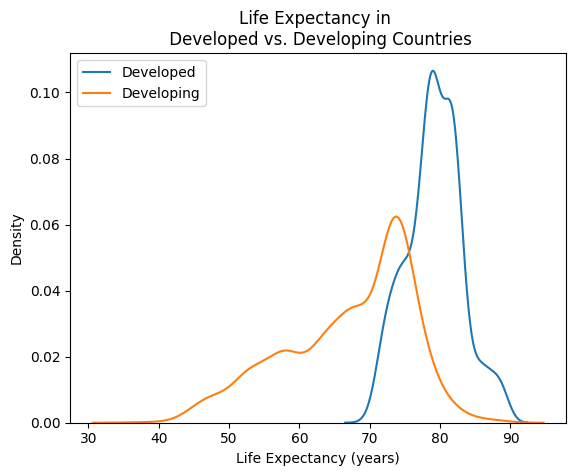

In [275]:
developing_countries = data[data["Status"] == "Developing"]
developed_countries = data[data["Status"] == "Developed"]
bins = np.arange(30, 90 + 5, 5)

sns.kdeplot(developed_countries["Life expectancy "], label="Developed")
sns.kdeplot(developing_countries["Life expectancy "], label="Developing")
plt.title("Life Expectancy in \n Developed vs. Developing Countries")
plt.xlabel("Life Expectancy (years)")
plt.legend()
plt.show()

### Features
- Alcohol Comsumption: per capita consumption (15+) in litres
- Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product Per Capita
- Hepatitis B: Immunization coverage (as a percent)
- Measles: Cases per 1000 people
- BMI: Average BMI
- Polio: immunization coverage among 1-year-olds (percentage)
- Total Expenditure: percentage of government spending on health
- Diptheria: immunization coverage among 1-year-olds (percentage)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS
- GDP: GDP per capita
- Population: of the country
- Thinness 10-19 years: The percentage of children and adolescents aged 10-19 years who are classified as "thin" or underweight based on their Body Mass Index (BMI)
- Thinness 5-9 years: The percentage of children and adolescents aged 5-9 years who are classified as "thin" or underweight based on their Body Mass Index (BMI)
- Income Composition: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Average number of years of education

### Future Features to consider
- Adult Mortality: Mortality rate per 1000
- Infant Deaths: Per 1000 population
- Under-five Deaths: number of under five deaths per 1000 population

In [276]:
def clean_feature_step(data, country, feature_col_name, minimum, maximum, range_max):
    updated_data = data
    cleaned = True
    data_in_question = data[data["Country"] == country][feature_col_name]
    data_max = data_in_question.max()
    data_min = data_in_question.min()
    if data_max > maximum:
        print(f"max value out of range for {country}: {data_max}")
    elif data_min < minimum:
        print(f"min value out of range for {country}: {data_min}")
    elif data_max - data_min > range_max:
        # Find the minimum value's index and multiply it
        updated_val = data_min*10
        if updated_val > maximum:
            print(f"attempted to update {data_min} to {updated_val} for {country}")
        else:
            min_idx = updated_data[updated_data["Country"] == country][feature_col_name].idxmin()  # Get index of min value
            updated_data.loc[min_idx, feature_col_name] *= 10
            print(f"found lower value of {data_min} and updated to {updated_val} for {country}")
            cleaned = False

    return updated_data, cleaned

def clean_feature(data, feature_col_name, minimum, maximum, range_max):
    for country in data["Country"].unique():
        cleaned = False
        while not cleaned:
            data, cleaned = clean_feature_step(data, country, feature_col_name, minimum, maximum, range_max)
    return data

In [277]:
data = clean_feature(data, "Adult Mortality", 0, 1000, 500)

found lower value of 3.0 and updated to 30.0 for Botswana
found lower value of 30.0 and updated to 300.0 for Botswana
found lower value of 34.0 and updated to 340.0 for Eritrea
found lower value of 3.0 and updated to 30.0 for Haiti
found lower value of 24.0 and updated to 240.0 for Haiti
found lower value of 28.0 and updated to 280.0 for Haiti
found lower value of 29.0 and updated to 290.0 for Haiti
found lower value of 30.0 and updated to 300.0 for Haiti
found lower value of 32.0 and updated to 320.0 for Haiti
found lower value of 33.0 and updated to 330.0 for Haiti
found lower value of 35.0 and updated to 350.0 for Haiti
found lower value of 35.0 and updated to 350.0 for Haiti
found lower value of 52.0 and updated to 520.0 for Lesotho
found lower value of 42.0 and updated to 420.0 for Malawi
found lower value of 66.0 and updated to 660.0 for Malawi
found lower value of 67.0 and updated to 670.0 for Malawi
found lower value of 6.0 and updated to 60.0 for Swaziland
found lower value of

In [286]:
data = clean_feature(data, "infant deaths", 0, 600, 500)
# India has ALL of their data over 900 for infant mortality rate. This is crazy so we will divide by 10 because that seems to be realistic
data.loc[data['Country'] == 'India', 'infant deaths'] = data.loc[data['Country'] == 'India', 'infant deaths'] // 10
# data = clean_feature(data, "infant deaths", 0, 600, 500) # good it actually cleaned

In [287]:
# data[data["Country"] == "South Sudan"]
# South Sudan has a ton of nans so we will drop this country
data = data[data['Country'] != 'South Sudan']

In [ ]:
def remove_NaNs_alcohol(data):
    for country in data["Country"].unique():
        data.iloc[data["Country"] == country, "Alcohol"]

In [ ]:
data = clean_feature(data, "Alcohol", 0, 20, 10)
data[data["Country"] == "Equatorial Guinea"]["Alcohol"]
# some of the alcohol values are NaN, so we will make the last recorded data point the alcohol consumption value

found lower value of 0.01 and updated to 0.1 for Cyprus
found lower value of 0.1 and updated to 1.0 for Cyprus
found lower value of 1.0 and updated to 10.0 for Cyprus
found lower value of 0.01 and updated to 0.1 for Equatorial Guinea
found lower value of 0.1 and updated to 1.0 for Equatorial Guinea
found lower value of 1.0 and updated to 10.0 for Equatorial Guinea
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.01 and updated to 0.1 for Estonia
found lower value of 0.1 and updated to 1.0 for Estonia
found lower value of 0.1 and updated to 1.0 for Estonia
found lower value of 0.1 and updated to 1.0 for Estonia
found lower value of 0.1 and updated to 1.0 for Estonia
found lower value of 0.1 and updated to 1.0 for Estonia
found lower

834      NaN
835    10.00
836    10.72
837    11.89
838    10.99
839     9.93
840     7.97
841     8.34
842     6.86
843     7.28
844     7.19
845     6.28
846     7.13
847     6.01
848     5.07
849     4.46
Name: Alcohol, dtype: float64